<a href="https://colab.research.google.com/github/CappyCap17/dl_model/blob/main/plant_disease_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Project'

In [5]:
import os

In [6]:
dir_list = os.listdir(path)

In [7]:
dir_list

['soil_classification.csv', 'Train', 'Test', 'Validation']

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [9]:
# Step 1: Defining training and test datasets

# Set image dimensions
img_width, img_height = 250, 250  # Adjusted based on the dataset

In [10]:
# Define paths for training and test datasets
train_data_dir = '/content/drive/MyDrive/Project/Train/Train'  # training data path
test_data_dir = '/content/drive/MyDrive/Project/Test/Test'  # test data path

In [11]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [12]:
# Data normalization for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.


In [14]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 150 images belonging to 3 classes.


In [15]:
# Step 2: Build the CNN Model

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Step 3: Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Step 4: Train the Model

# Including the use of EarlyStopping to stop training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,  # Changed 'test_data' to 'validation_data'
    validation_steps=test_generator.samples // test_generator.batch_size,  # Added 'validation_steps'
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 501s 10s/step - accuracy: 0.3967 - loss: 1.6878 - val_accuracy: 0.6484 - val_loss: 0.7564
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6875 - loss: 0.8442

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.6875 - loss: 0.8442 - val_accuracy: 0.5455 - val_loss: 0.7814
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6677 - loss: 0.7550 - val_accuracy: 0.7578 - val_loss: 0.6203
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9062 - loss: 0.3525 - val_accuracy: 0.8182 - val_loss: 0.5481
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7620 - loss: 0.6429 - val_accuracy: 0.7812 - val_loss: 0.6317
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7812 - loss: 0.5811 - val_accuracy: 0.8182 - val_loss: 0.5454
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8403 - loss: 0.4549 - val_accuracy: 0.7656 - val_loss: 0.7173
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9375 - loss: 0.3096 - val_accuracy: 0.7273 - val_loss: 0.8691
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8716 - loss: 0.4652 - val_accuracy: 0.8984 - val_loss: 

In [20]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9178 - loss: 0.2599
Test Accuracy: 0.93


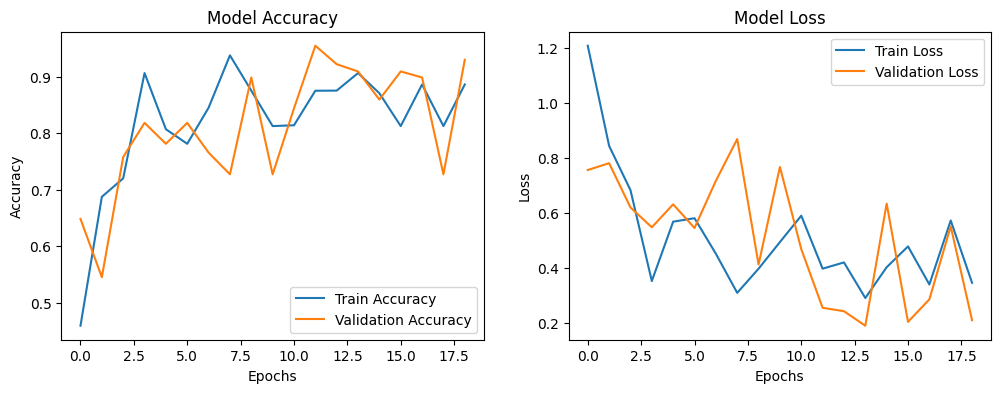

In [22]:
# Step 5: Evaluate the Model

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
# Step 6: Save the Model

model.save('plant_health_classifier.h5')

print("Model saved as 'plant_health_classifier.h5'")

Model saved as 'plant_health_classifier.h5'


In [29]:
import tensorflow as tf
from google.colab import files

export_dir = '/content/plant_health_classifier.h5'
model.save(export_dir)  # Saved the model in H5 format



In [28]:
files.download(export_dir)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>